In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns 

In [76]:
df = pd.read_csv("product_review_data.csv")
df

,label,review
0,beauty,Sunscreen is non-greasy and protects well from...
1,home,Mixer grinder works efficiently and makes less...
2,clothing,The shirt fits perfectly and the material feel...
3,electronics,The keyboard feels premium and responsive.
4,beauty,The face cream feels light and absorbs quickly.
...,...,...
495,clothing,"Sweater quality is good, exactly as shown in p..."
496,electronics,The keyboard feels premium and responsive.
497,electronics,This laptop performance is amazing for the price.
498,home,Lamp gives a cozy light perfect for reading.


In [77]:
x = df['review']
y = df["label"]

In [78]:
vectorizer = CountVectorizer()
x_vectorized = vectorizer.fit_transform(x)
x_vectorized

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3956 stored elements and shape (500, 205)>

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x_vectorized,y, test_size=0.2, random_state= 20)

In [80]:
model = MultinomialNB()
model.fit(x_train,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [81]:
y_pred = model.predict(x_test)
y_pred

array(['beauty', 'electronics', 'beauty', 'home', 'electronics',
       'electronics', 'electronics', 'clothing', 'electronics',
       'electronics', 'beauty', 'home', 'electronics', 'home', 'home',
       'beauty', 'clothing', 'home', 'clothing', 'beauty', 'electronics',
       'beauty', 'beauty', 'beauty', 'clothing', 'beauty', 'home',
       'clothing', 'beauty', 'beauty', 'electronics', 'beauty',
       'electronics', 'clothing', 'home', 'home', 'clothing', 'clothing',
       'clothing', 'electronics', 'electronics', 'clothing', 'clothing',
       'home', 'beauty', 'electronics', 'beauty', 'electronics', 'beauty',
       'home', 'clothing', 'electronics', 'clothing', 'beauty', 'home',
       'home', 'electronics', 'home', 'beauty', 'electronics', 'home',
       'clothing', 'clothing', 'clothing', 'clothing', 'electronics',
       'beauty', 'beauty', 'clothing', 'home', 'clothing', 'clothing',
       'electronics', 'home', 'electronics', 'clothing', 'electronics',
       'clothing'

In [82]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

1.0

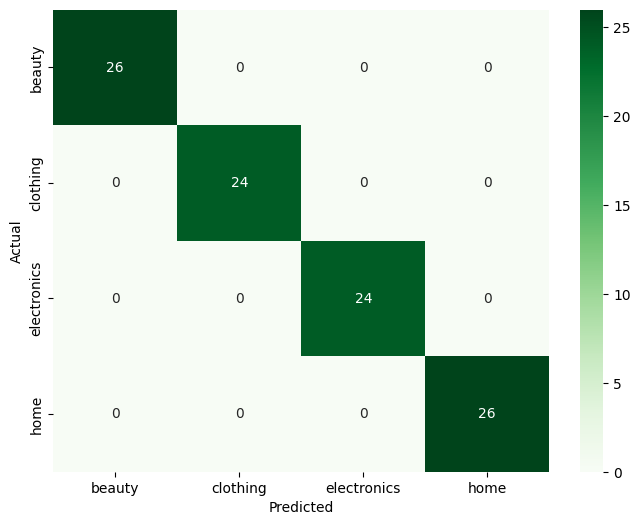

In [83]:
plt.figure(figsize=(8,6))
cm = pd.crosstab(y_test,y_pred, rownames=['Actual'], colnames= ["Predicted"])
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Greens')
plt.show()

In [90]:
new_data = ["The serum adds a nice glow and feels lightweight on skin.",
            "The pressure cooker heats quickly and saves time."]
new_data_vectorized = vectorizer.transform(new_data)
prediction = model.predict(new_data_vectorized)
for review,label in zip(new_data,prediction):
    print(f'Review : "{review}" => Predicted Label: {label}')

Review : "The serum adds a nice glow and feels lightweight on skin." => Predicted Label: beauty
Review : "The pressure cooker heats quickly and saves time." => Predicted Label: home
